## Biblioteca importadas

In [39]:
import numpy as np  
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [40]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [41]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [42]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [43]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [44]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [45]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [46]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [47]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)

#### Inflação do turismo no Brasil

In [48]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)

#### PIB do Brasil e dos Estados dos aeroportos 

In [49]:
filename = r'C:Dados macros\pib_real.xlsx'
pib = pd.read_excel(filename)

## Analise exploratoria

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [77]:
principal =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

principal.head()

,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR,PIB REAL MA,PIB REAL SC,PIB REAL TO
0,2000,2981167,0.000000,329,27.60,1.9678,7.04,5.051888e+12,1.839688e+12,3.128403e+11,5.645866e+10,1.931659e+11,1.887118e+10
1,2001,3198439,0.072882,581,23.12,2.3840,6.84,5.122104e+12,1.839688e+12,3.128403e+11,5.645866e+10,1.931659e+11,1.887118e+10
2,2002,3860727,0.207066,20,24.36,3.7342,8.45,5.278505e+12,1.839688e+12,3.128403e+11,5.645866e+10,1.931659e+11,1.887118e+10
3,2003,3317577,-0.140686,29211,28.10,2.9293,14.71,5.338724e+12,1.838010e+12,3.419598e+11,6.060745e+10,1.991932e+11,2.054859e+10
4,2004,3341621,0.007247,54979,36.05,2.7508,6.60,5.646232e+12,1.883150e+12,3.560391e+11,6.381553e+10,2.123200e+11,2.091384e+10


#### Correlação entre os dados pré selecionados 

In [78]:
principal = principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR
Ano,1.000000,0.825633,-0.296982,0.537493,0.498046,0.462911,-0.379601,0.934155,0.898730,0.963626
Passageiros,0.825633,1.000000,-0.063254,0.747097,0.757172,0.089808,-0.283610,0.954258,0.963111,0.898470
Passageiros_freq,-0.296982,-0.063254,1.000000,0.159826,0.090478,-0.393514,-0.353917,-0.186454,-0.134818,-0.333162
Passageiros internacionais,0.537493,0.747097,0.159826,1.000000,0.769081,-0.233850,-0.354779,0.718224,0.747865,0.591033
Preço,0.498046,0.757172,0.090478,0.769081,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.617865
dolar,0.462911,0.089808,-0.393514,-0.233850,-0.336762,1.000000,0.166638,0.202944,0.108461,0.341305
inflacao,-0.379601,-0.283610,-0.353917,-0.354779,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.311484
PIB REAL BRASIL,0.934155,0.954258,-0.186454,0.718224,0.739618,0.202944,-0.388362,1.000000,0.991895,0.975378
PIB REAL SP,0.898730,0.963111,-0.134818,0.747865,0.768696,0.108461,-0.408767,0.991895,1.000000,0.951621
PIB REAL PR,0.963626,0.898470,-0.333162,0.591033,0.617865,0.341305,-0.311484,0.975378,0.951621,1.000000


#### Análise grafica

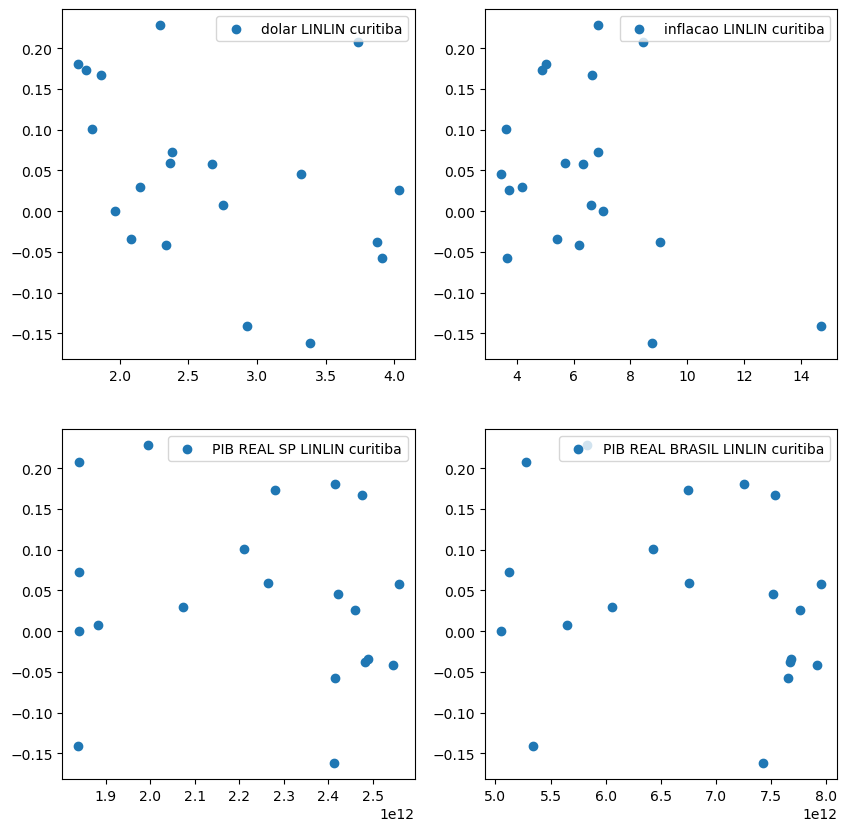

In [79]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros_freq"], label='dolar LINLIN curitiba')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros_freq"], label = 'inflacao LINLIN curitiba' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros_freq"], label = 'PIB REAL SP LINLIN curitiba' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros_freq"], label='PIB REAL BRASIL LINLIN curitiba')
ax[1,1].legend()

plt.show()

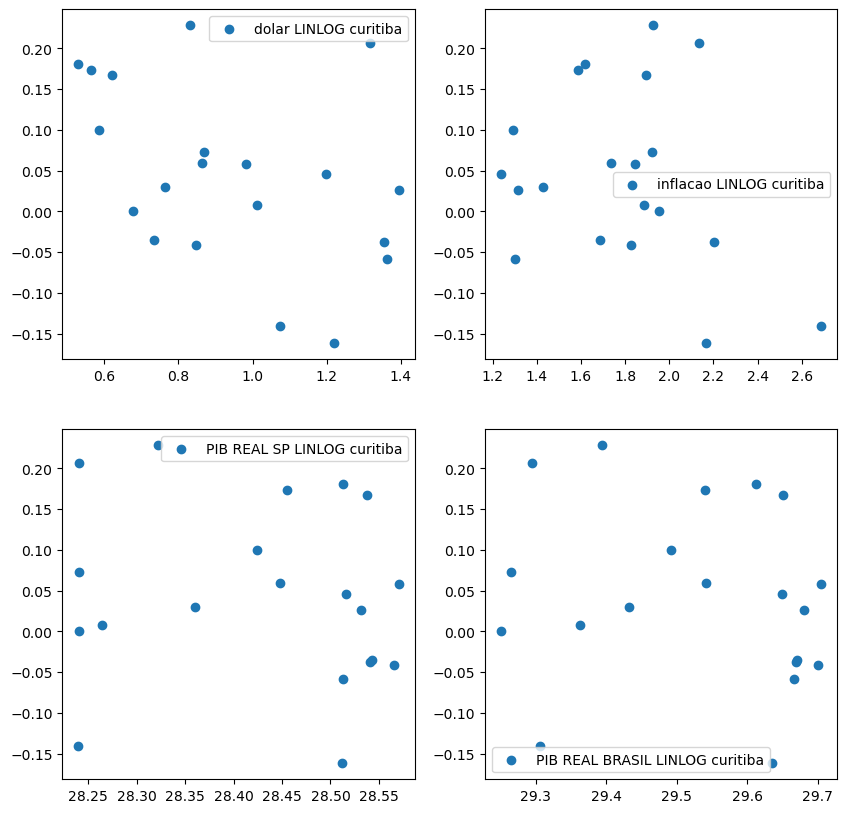

In [80]:
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros_freq"], label='dolar LINLOG curitiba')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros_freq"], label = 'inflacao LINLOG curitiba' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros_freq"], label = 'PIB REAL SP LINLOG curitiba' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros_freq"], label='PIB REAL BRASIL LINLOG curitiba')
ax[1,1].legend()

plt.show()

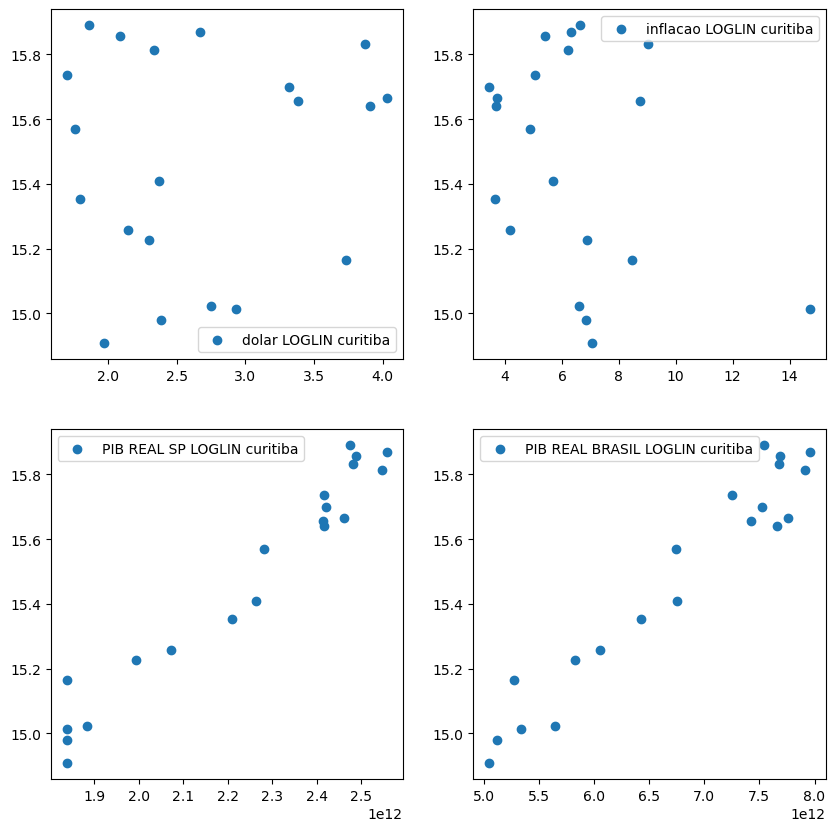

In [57]:
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros"]), label='dolar LOGLIN curitiba')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros"]), label = 'inflacao LOGLIN curitiba' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros"]), label = 'PIB REAL SP LOGLIN curitiba' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros"]), label='PIB REAL BRASIL LOGLIN curitiba')
ax[1,1].legend()

plt.show()

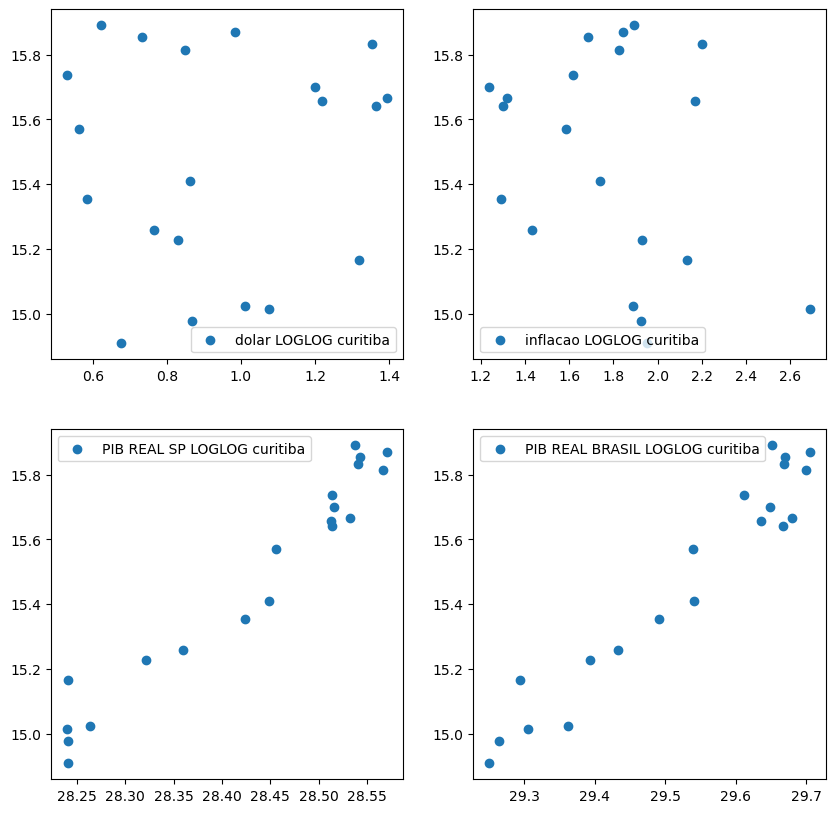

In [58]:
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros"]), label='dolar LOGLOG curitiba')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros"]), label = 'inflacao LOGLOG curitiba' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros"]), label = 'PIB REAL SP LOGLOG curitiba' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros"]), label='PIB REAL BRASIL LOGLOG curitiba')
ax[1,1].legend()

plt.show()

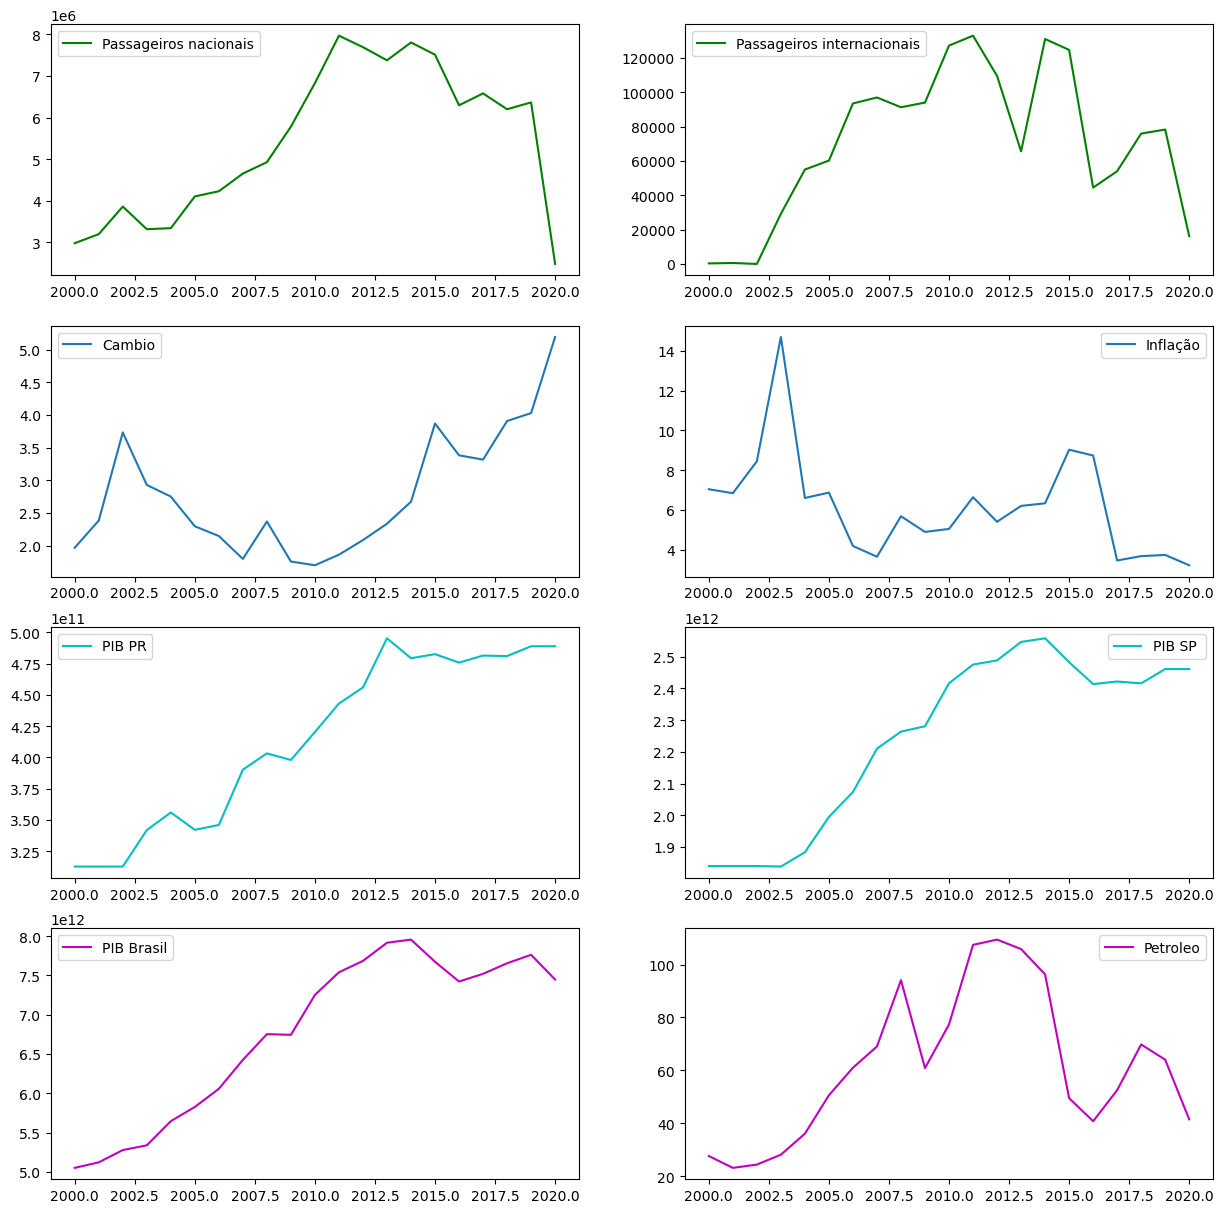

In [37]:

fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [69]:
principal =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [70]:
principal= principal.loc[principal["Ano"]<2020]

principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR
Ano,1.000000,0.965459,0.026699,0.856124,0.498046,0.462911,-0.379601,0.934155,0.898730,0.963626
Passageiros,0.965459,1.000000,0.077352,0.927720,0.477749,0.490011,-0.329348,0.906031,0.866309,0.940676
Passageiros_freq,0.026699,0.077352,1.000000,0.055513,0.198988,-0.215846,-0.017826,0.113686,0.111725,0.037894
Passageiros internacionais,0.856124,0.927720,0.055513,1.000000,0.386478,0.556759,-0.238665,0.776142,0.713907,0.825925
Preço,0.498046,0.477749,0.198988,0.386478,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.617865
dolar,0.462911,0.490011,-0.215846,0.556759,-0.336762,1.000000,0.166638,0.202944,0.108461,0.341305
inflacao,-0.379601,-0.329348,-0.017826,-0.238665,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.311484
PIB REAL BRASIL,0.934155,0.906031,0.113686,0.776142,0.739618,0.202944,-0.388362,1.000000,0.991895,0.975378
PIB REAL SP,0.898730,0.866309,0.111725,0.713907,0.768696,0.108461,-0.408767,0.991895,1.000000,0.951621
PIB REAL PR,0.963626,0.940676,0.037894,0.825925,0.617865,0.341305,-0.311484,0.975378,0.951621,1.000000


##### Análise grafica

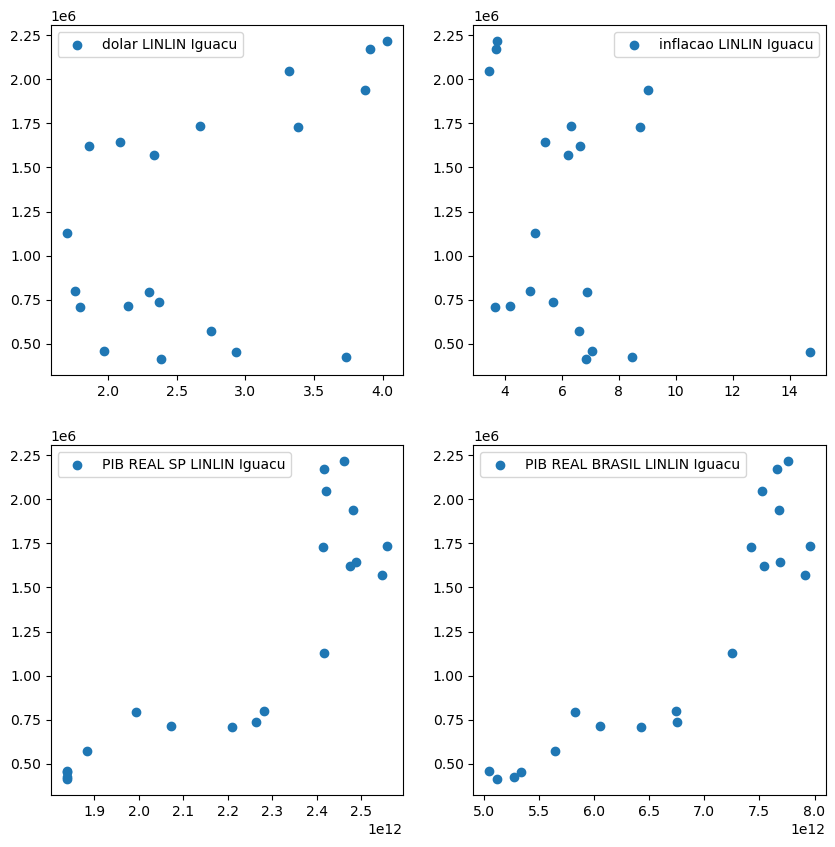

In [71]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros"], label='dolar LINLIN Iguacu')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros"], label = 'inflacao LINLIN Iguacu' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros"], label = 'PIB REAL SP LINLIN Iguacu' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros"], label='PIB REAL BRASIL LINLIN Iguacu')
ax[1,1].legend()

plt.show()

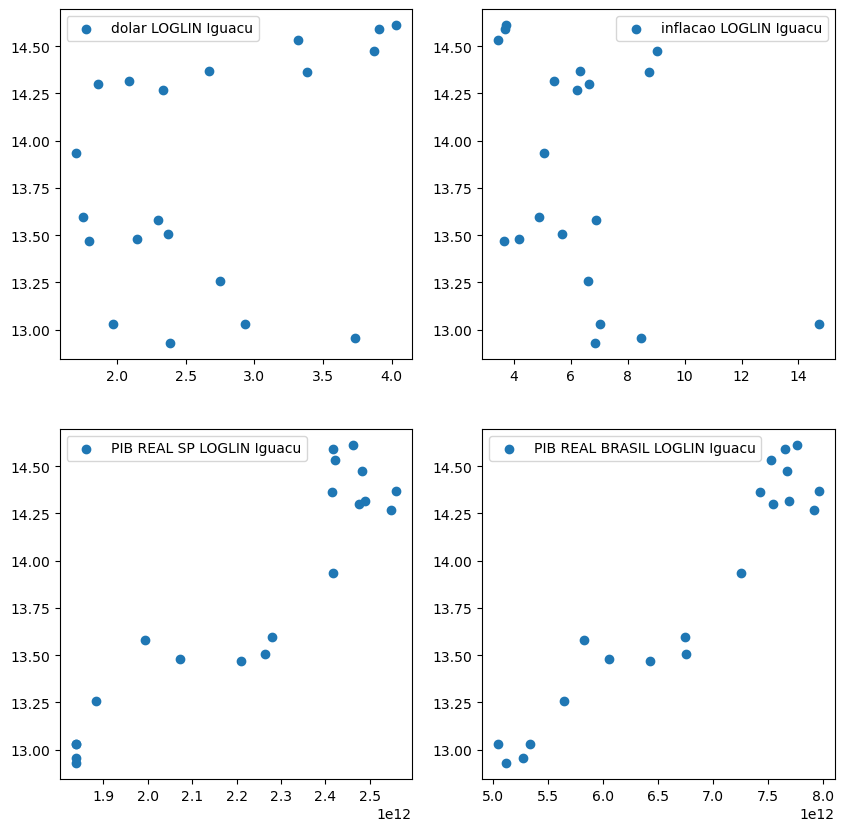

In [72]:
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros"]), label='dolar LOGLIN Iguacu')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros"]), label = 'inflacao LOGLIN Iguacu' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros"]), label = 'PIB REAL SP LOGLIN Iguacu' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros"]), label='PIB REAL BRASIL LOGLIN Iguacu')
ax[1,1].legend()

plt.show()

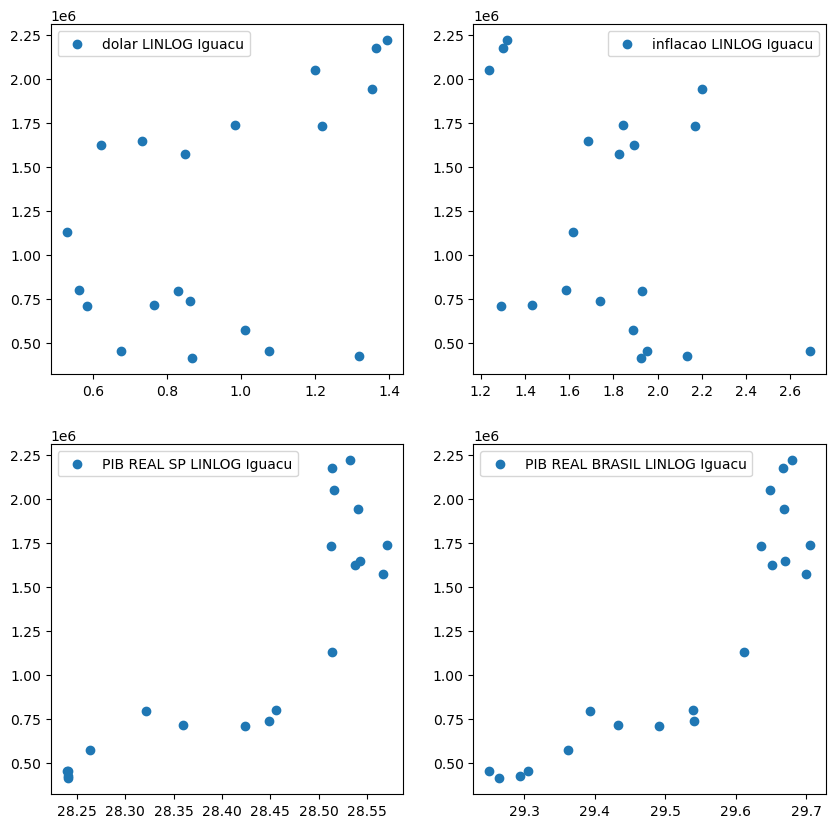

In [73]:
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros"], label='dolar LINLOG Iguacu')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros"], label = 'inflacao LINLOG Iguacu' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros"], label = 'PIB REAL SP LINLOG Iguacu' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros"], label='PIB REAL BRASIL LINLOG Iguacu')
ax[1,1].legend()

plt.show()

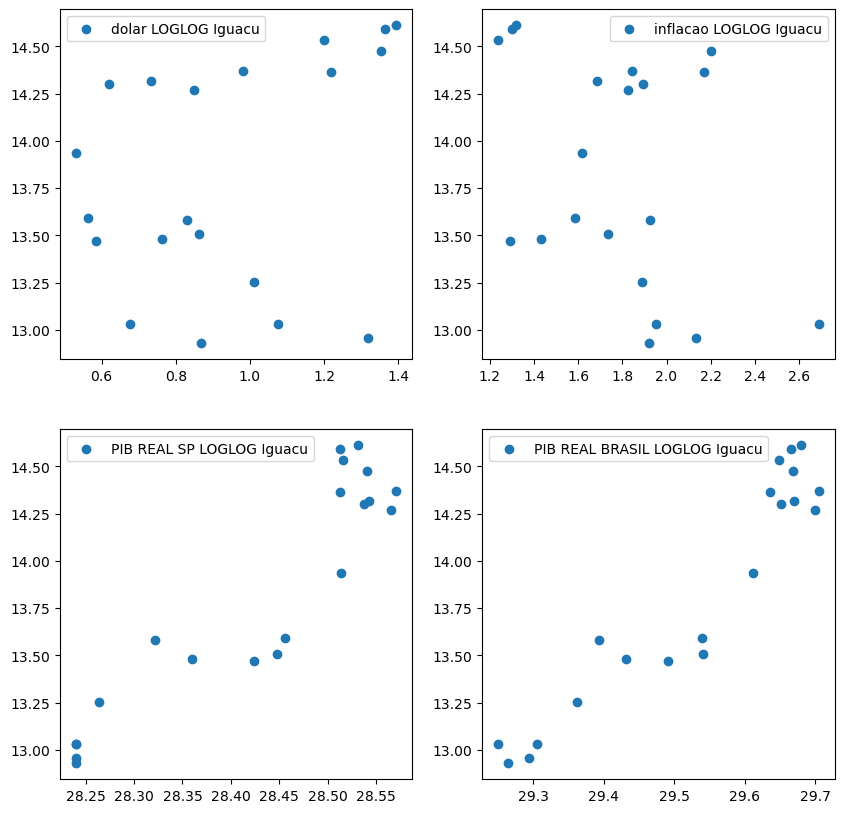

In [74]:
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros"]), label='dolar LOGLOG Iguacu')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros"]), label = 'inflacao LOGLOG Iguacu' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros"]), label = 'PIB REAL SP LOGLOG Iguacu' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros"]), label='PIB REAL BRASIL LOGLOG Iguacu')
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
principal= principal.loc[principal["Ano"]<2020]

principal.drop(["PIB REAL MA", "PIB REAL PR","PIB REAL TO"],axis=1).corr()

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
principal= principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL PR"],axis=1).corr()

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()

## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
principal= principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL PR", "PIB REAL SC","PIB REAL TO"],axis=1).corr()

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["PIB REAL MA"],"g", label='PIB MA')
ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()

## Comparação de passageiros nos aeroportos analisados

In [ ]:
plt.plot(cwb_nac["Ano"], cwb_nac["Passageiros"], label='Curitiba')
plt.legend()

plt.plot(igu_nac["Ano"], igu_nac["Passageiros"], label='Foz do Iguaçu')
plt.legend()
#
plt.plot(nvt_nac["Ano"], nvt_nac["Passageiros"], label='Navegantes')
plt.legend()
#
plt.plot(slz["Ano"], slz["Passageiros"], label='São Luiz')
plt.legend()
#
plt.plot(pmw["Ano"], pmw["Passageiros"], label='Palmas')
plt.legend()

plt.title("Voos Nacionais")
plt.show()




plt.plot(cwb_nac["Ano"], cwb_int["Passageiros internacionais"], label='Curitiba')
plt.legend()

plt.plot(igu_nac["Ano"], igu_int["Passageiros internacionais"], label='Foz do Iguaçu')
plt.legend()

plt.plot(nvt_nac["Ano"], nvt_int["Passageiros internacionais"], label='Navegantes')
plt.legend()

plt.title("Voos Internacionais")
plt.show()